In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from nltk.corpus import stopwords

In [4]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, label_binarize

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [8]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [9]:
df = pd.read_csv(r"C:\Users\keith\Downloads\ACCITRACK_csv\Combined.csv")
print(df.head())

  Date Reported Time Committed Weather Conditions   Barangay/Location  \
0      1/1/2016     9:25:00 PM               rainy       PADRE BURGOS   
1      1/1/2016     2:30:00 AM               clear  DIZON SUBDIVISION   
2      1/1/2016     4:30:00 AM               foggy             PINGET   
3      1/1/2016    12:30:00 PM               foggy    MINES VIEW PARK   
4      2/1/2016     6:20:00 PM               rainy   SAN LUIS VILLAGE   

      Type of Place                                      VTA Category   \
0     Parking Area   RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...   
1  Along the street  RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...   
2  Along the street  RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...   
3  Along the street  RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...   
4  Along the street  RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...   

  Victim Killed Victim Injured Victim Unharmed  \
0            No             No             Yes   
1            No 

In [10]:
df

,Date Reported,Time Committed,Weather Conditions,Barangay/Location,Type of Place,VTA Category,Victim Killed,Victim Injured,Victim Unharmed,"Main Cause (e.g. Human, Vehicle, Infrastructure, Environmental)",Details of Main Cause (e.g. Human-Intoxication),Case Status,Road Conditions
0,1/1/2016,9:25:00 PM,rainy,PADRE BURGOS,Parking Area,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,SOLVED (AMICABLY SETTLED),wet
1,1/1/2016,2:30:00 AM,clear,DIZON SUBDIVISION,Along the street,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Illegal Overtaking,SOLVED (AMICABLY SETTLED),dry
2,1/1/2016,4:30:00 AM,foggy,PINGET,Along the street,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Environmental,Erosion of Roadside,SOLVED (AMICABLY SETTLED),damp
3,1/1/2016,12:30:00 PM,foggy,MINES VIEW PARK,Along the street,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Illegal Overtaking,SOLVED (AMICABLY SETTLED),damp
4,2/1/2016,6:20:00 PM,rainy,SAN LUIS VILLAGE,Along the street,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Speeding,SOLVED (AMICABLY SETTLED),wet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10604,12/30/2024,3:40:00 PM,rainy,SESSION GOV. PACK,Along the street,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Environmental,Slippery Road due to Rain,SOLVED (AMICABLY SETTLED),wet
10605,12/30/2024,10:30:00 PM,foggy,SESSION GOV. PACK,Along the street,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,SOLVED (AMICABLY SETTLED),damp
10606,12/29/2024,5:45:00 PM,clear,PACDAL,Along the street,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,SOLVED (AMICABLY SETTLED),dry
10607,12/29/2024,5:55:00 PM,clear,CAMP 7,Along the street,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Speeding,SOLVED (AMICABLY SETTLED),dry


# Parameters Explanations

ID: Thisis a unique identifier of the accident record.

Source: Indicates source of the accident report (i.e. the API which reported the accident.).

TMC: A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.

Severity: Shows the severity of the accident, a number between 1 and 4, where 
    1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 
    4 indicates a significant impact on traffic (i.e., long delay).
    
Start_Time: Shows start time of the accident in local time zone.

End_Time: Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.

Start_Lat: Shows latitude in GPS coordinate of the start point.

Start_Lng: Shows longitude in GPS coordinate of the start point.

End_Lat: Shows latitude in GPS coordinate of the end point.

End_Lng: Shows longitude in GPS coordinate of the end point.

Distance(mi): The length of the road extent affected by the accident.

Description: Shows natural language description of the accident.

Number: Shows the street number in address field.

Street: Shows the street name in address field.

Side: Shows the relative side of the street (Right/Left) in address field.

City: Shows the city in address field.

County: Shows the county in address field.

State: Shows the state in address field.

Zipcode: Shows the zipcode in address field.

Country: Shows the country in address field.

Timezone: Shows timezone based on the location of the accident (eastern, central, etc.).

Airport_Code: Denotes an airport-based weather station which is the closest one to location of the accident.

Weather_Timestamp: Shows the time-stamp of weather observation record (in local time).

Temperature(F): Shows the temperature (in Fahrenheit).

Wind_Chill(F): Shows the wind chill (in Fahrenheit).

Humidity(%): Shows the humidity (in percentage).

Pressure(in): Shows the air pressure (in inches).

Visibility(mi): Shows visibility (in miles).

Wind_Direction: Shows wind direction.

Wind_Speed(mph): Shows wind speed (in miles per hour).

Precipitation(in): Shows precipitation amount in inches, if there is any.

Weather_Condition: Shows the weather condition (rain, snow, thunderstorm, fog, etc.)

Amenity: A POI annotation which indicates presence of amenity in a nearby location.

Bump: A POI annotation which indicates presence of speed bump or hump in a nearby location.

Crossing: A POI annotation which indicates presence of crossing in a nearby location.

Give_Way: A POI annotation which indicates presence of give_way in a nearby location.

Junction: A POI annotation which indicates presence of junction in a nearby location.

No_Exit: A POI annotation which indicates presence of no_exit in a nearby location.

Railway: A POI annotation which indicates presence of railway in a nearby location.

Roundabout: A POI annotation which indicates presence of roundabout in a nearby location.

Station: A POI annotation which indicates presence of station in a nearby location.

Stop: A POI annotation which indicates presence of stop in a nearby location.

Traffic_Calming: A POI annotation which indicates presence of traffic_calming in a nearby location.

Traffic_Signal: A POI annotation which indicates presence of traffic_signal in a nearby location.

Turning_Loop: A POI annotation which indicates presence of turning_loop in a nearby location.

Sunrise_Sunse: Shows the period of day (i.e. day or night) based on sunrise/sunset.

Civil_Twilight: Shows the period of day (i.e. day or night) based on civil twilight.

Nautical_Twilight: Shows the period of day (i.e. day or night) based on nautical twilight.

Astronomical_Twilight: Shows the period of day (i.e. day or night) based on astronomical twilight.

# Most frequent words in the description of an accident with severity 4

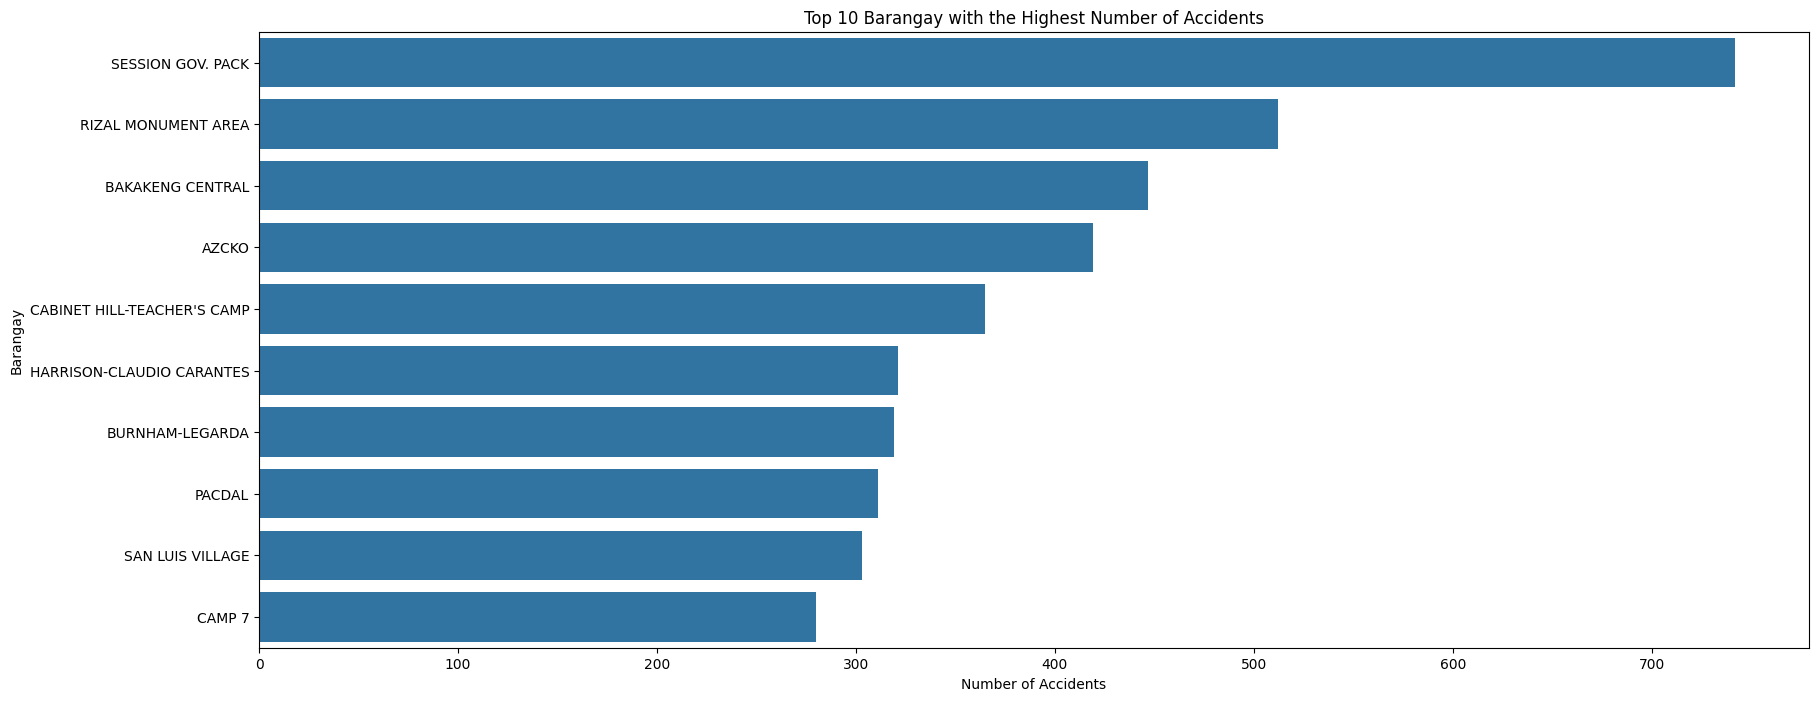

In [11]:
plt.figure(figsize=(20, 8))
plt.title("Top 10 Barangay with the Highest Number of Accidents")

# Get the counts for the top 10 barangays
state_counts = df["Barangay/Location"].value_counts()

# Create the bar plot
sns.barplot(x=state_counts[:10].values, y=state_counts[:10].index, orient="h")

# Set labels
plt.xlabel("Number of Accidents")
plt.ylabel("Barangay")

# Show the plot
plt.show()

We are going to compute the most frequent words in the description column of the accidents with a value of severity equal to 4, using some stopwords from the english language.

# Most frequent weather features

We are going to analyze which are the most frequent road features in accidents.

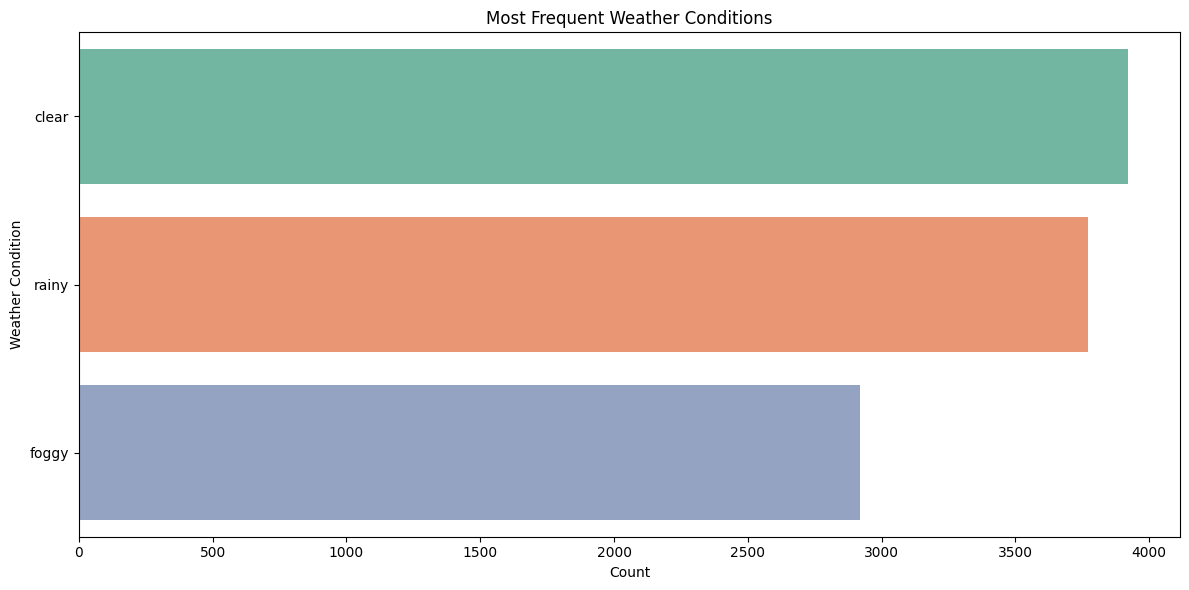

In [12]:
# Count occurrences of each weather condition
data = df["Weather Conditions "].value_counts().reset_index()
data.columns = ['Weather Conditions', 'Count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Weather Conditions', data=data, orient='h', palette="Set2")
plt.title("Most Frequent Weather Conditions")
plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()

As we can see, most of the accidents occured near a traffic signal, expecially where a junction or a crossing was present.

The fourth most common road feature, instead, was the presence of a nearby station, probably because of the high presence of vehicles.

# Weather condition histogram

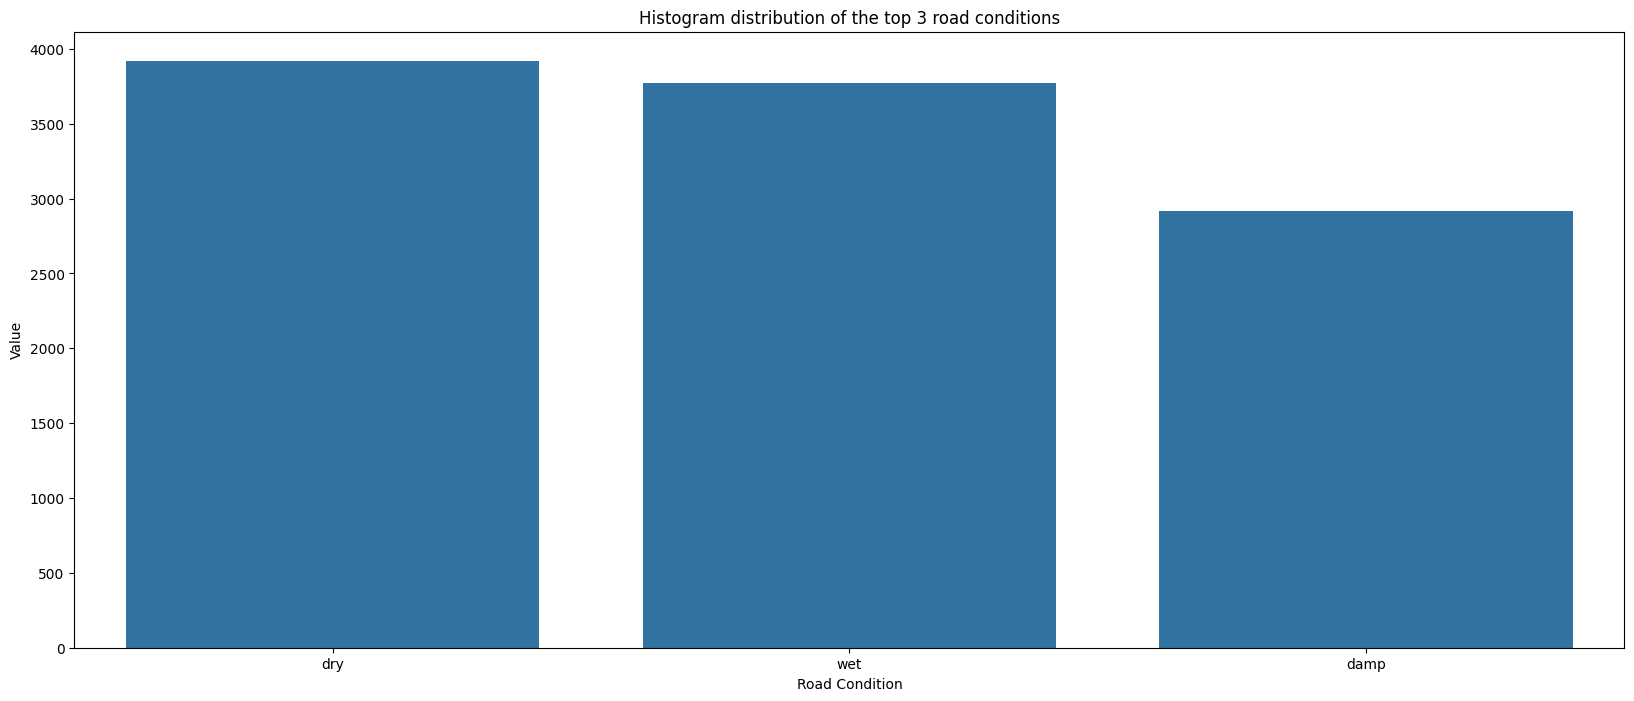

In [13]:
counts = df["Road Conditions "].value_counts()[:3]

plt.figure(figsize=(20, 8))
plt.title("Histogram distribution of the top 3 road conditions")  # Also fixed the title
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Road Condition")
plt.ylabel("Value")
plt.show()


In most frequent cases the weather condition is clear.

# Number of accidents for weekday

Unparsable dates: 0


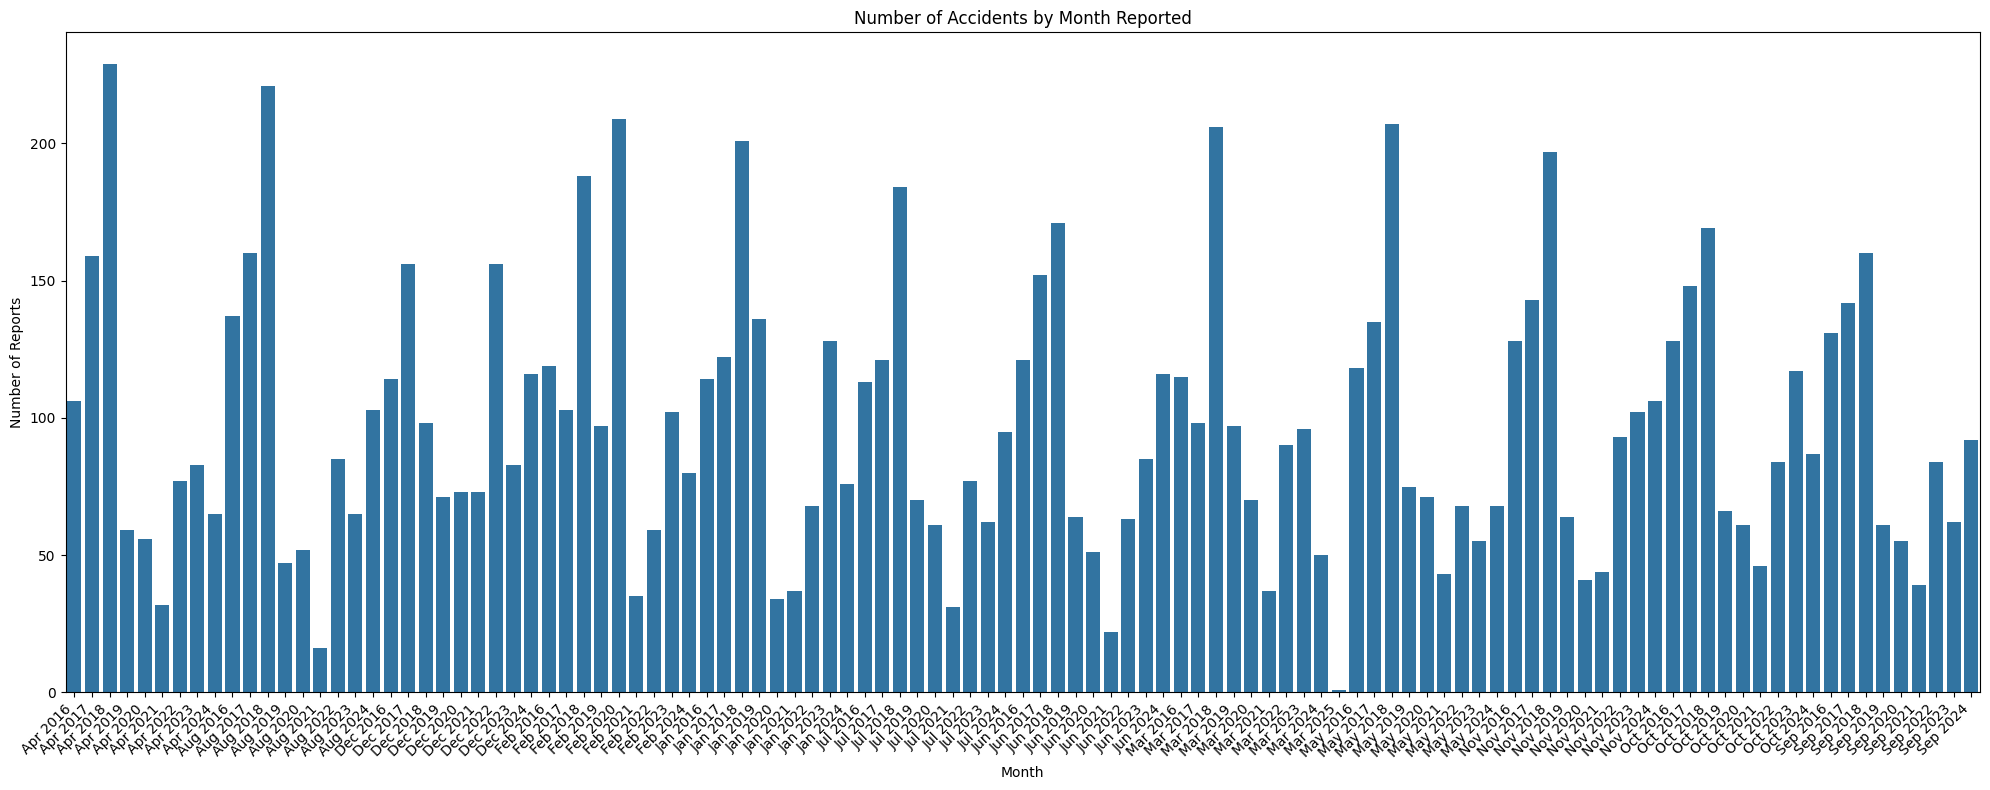

In [14]:
# Step 1: Convert to datetime (handle errors)
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce')

# Optional: Check how many couldn't be converted
print("Unparsable dates:", df['Date Reported'].isna().sum())

# Optional: Drop rows where date parsing failed
df = df.dropna(subset=['Date Reported'])

# Step 2: Create a simplified month-year column like 'Jan 2016'
df['Month_Reported'] = df['Date Reported'].dt.strftime('%b %Y')

# Step 3: Count occurrences by month
counts = df['Month_Reported'].value_counts().sort_index()

# Step 4: Plot
plt.figure(figsize=(20, 8))
plt.title("Number of Accidents by Month Reported")
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Month")
plt.ylabel("Number of Reports")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As we can see from the plot above, the days with the most accidents are working days, while in the weekend we have a frequency of at least 2/3 less. This may be due to the fact that during the weekend there are fewer cars on the road.

# Droping unwanted features

We are going to drop the following features:

ID, Source: since they dont carry any information for the severity

TMC: because it could already contains information about the accident severity

Start_Time: because it was decomposed by the time features added before (day, month, weekday)

End_Time: beause we cannot know in advance when the traffic flow will become regular again

Start_Lat, Start_Lng, End_Lat, End_Lng: beause we cannot know latitude and longitude 

Description: most description only report the name of the road of the accident, and so we decided to omit this feature

Number, Street, County, State, Zipcode, Country: because we just focus on the City where the accident happened

Timezone, Airport_Code, Weather_Timestamp, Wind_Chill(F): because they are not useful for our task

Turning_Loop: since its always false

Sunrise_Sunset, Nautical_Twilight, Astronomical_Twilight: because they are redundant

Amenity,Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal: because most of the values are false.

In [15]:
features = ["Time Committed", "Type of Place", "Case Status"]
df = df.drop(features, axis=1)

In [16]:
df

,Date Reported,Weather Conditions,Barangay/Location,VTA Category,Victim Killed,Victim Injured,Victim Unharmed,"Main Cause (e.g. Human, Vehicle, Infrastructure, Environmental)",Details of Main Cause (e.g. Human-Intoxication),Road Conditions,Month_Reported
0,2016-01-01,rainy,PADRE BURGOS,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,wet,Jan 2016
1,2016-01-01,clear,DIZON SUBDIVISION,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Illegal Overtaking,dry,Jan 2016
2,2016-01-01,foggy,PINGET,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Environmental,Erosion of Roadside,damp,Jan 2016
3,2016-01-01,foggy,MINES VIEW PARK,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Illegal Overtaking,damp,Jan 2016
4,2016-02-01,rainy,SAN LUIS VILLAGE,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Speeding,wet,Feb 2016
...,...,...,...,...,...,...,...,...,...,...,...
10604,2024-12-30,rainy,SESSION GOV. PACK,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Environmental,Slippery Road due to Rain,wet,Dec 2024
10605,2024-12-30,foggy,SESSION GOV. PACK,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,damp,Dec 2024
10606,2024-12-29,clear,PACDAL,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,dry,Dec 2024
10607,2024-12-29,clear,CAMP 7,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Speeding,dry,Dec 2024


# Drop duplicates

We are going to check if there are some duplicates in the dataset.

In [17]:
print("Number of rows:", len(df.index))
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(df.index))

Number of rows: 10609
Number of rows after drop of duplicates: 10587


# Correlation

# Label Encoding

In [18]:
df.columns

Index(['Date Reported', 'Weather Conditions ', 'Barangay/Location',
       'VTA Category ', 'Victim Killed', 'Victim Injured', 'Victim Unharmed',
       'Main Cause (e.g. Human, Vehicle, Infrastructure, Environmental)',
       'Details of Main Cause (e.g.  Human-Intoxication)', 'Road Conditions ',
       'Month_Reported'],
      dtype='object')

In [19]:
l=LabelEncoder()

In [20]:
x = df.copy()  
x_encoded = x.copy()

for col in x_encoded.columns:
    if x_encoded[col].dtype == 'object':
        x_encoded[col] = LabelEncoder().fit_transform(x_encoded[col])

In [21]:
v=l.fit_transform(df["VTA Category "])
b=l.fit_transform(df["Barangay/Location"])
r=l.fit_transform(df["Road Conditions "])
w=l.fit_transform(df["Weather Conditions "])
d=l.fit_transform(df["Date Reported"])

In [22]:
df["VTA Category"]=v

In [23]:
df["Barangay/Location"]=b

In [24]:
df["Road Conditions"]=r

In [25]:
df["Weather Conditions"]=w

In [26]:
df["Date Reported"]=d

In [27]:
df

,Date Reported,Weather Conditions,Barangay/Location,VTA Category,Victim Killed,Victim Injured,Victim Unharmed,"Main Cause (e.g. Human, Vehicle, Infrastructure, Environmental)",Details of Main Cause (e.g. Human-Intoxication),Road Conditions,Month_Reported,VTA Category,Road Conditions,Weather Conditions
0,0,rainy,90,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,wet,Jan 2016,0,2,2
1,0,clear,32,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Illegal Overtaking,dry,Jan 2016,0,1,0
2,0,foggy,94,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Environmental,Erosion of Roadside,damp,Jan 2016,0,0,1
3,0,foggy,80,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Illegal Overtaking,damp,Jan 2016,0,0,1
4,31,rainy,108,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Speeding,wet,Feb 2016,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10604,2809,rainy,116,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Environmental,Slippery Road due to Rain,wet,Dec 2024,0,2,2
10605,2809,foggy,116,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,damp,Dec 2024,0,0,1
10606,2808,clear,89,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,dry,Dec 2024,0,1,0
10607,2808,clear,22,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Speeding,dry,Dec 2024,0,1,0


In [28]:
x = df.iloc[:500000,1:]
y = df.iloc[:500000,:1]

In [29]:
x

,Weather Conditions,Barangay/Location,VTA Category,Victim Killed,Victim Injured,Victim Unharmed,"Main Cause (e.g. Human, Vehicle, Infrastructure, Environmental)",Details of Main Cause (e.g. Human-Intoxication),Road Conditions,Month_Reported,VTA Category,Road Conditions,Weather Conditions
0,rainy,90,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,wet,Jan 2016,0,2,2
1,clear,32,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Illegal Overtaking,dry,Jan 2016,0,1,0
2,foggy,94,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Environmental,Erosion of Roadside,damp,Jan 2016,0,0,1
3,foggy,80,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Illegal Overtaking,damp,Jan 2016,0,0,1
4,rainy,108,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Speeding,wet,Feb 2016,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10604,rainy,116,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Environmental,Slippery Road due to Rain,wet,Dec 2024,0,2,2
10605,foggy,116,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,damp,Dec 2024,0,0,1
10606,clear,89,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,dry,Dec 2024,0,1,0
10607,clear,22,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Speeding,dry,Dec 2024,0,1,0


In [30]:
y

,Date Reported
0,0
1,0
2,0
3,0
4,31
...,...
10604,2809
10605,2809
10606,2808
10607,2808


# Handle Imbalanced data

In [31]:
y["Date Reported"].value_counts(normalize=True)*100

Date Reported
1386    0.321149
1401    0.283366
1405    0.273921
1432    0.236139
1403    0.198356
          ...   
614     0.009446
664     0.009446
622     0.009446
619     0.009446
643     0.009446
Name: proportion, Length: 2811, dtype: float64

In [32]:
print(y.value_counts())

Date Reported
1386             34
1401             30
1405             29
1432             25
1403             21
                 ..
442               1
441               1
437               1
2141              1
2133              1
Name: count, Length: 2811, dtype: int64


The severity attribute as we can see from the previous plot is highly unbalanced, the number of accident with the severity 1 is very small instead the number of accident with severity 2 is much higher.

# Train, Test data splitting

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=0)

# Scaling

In [34]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Make a copy to avoid changing the original
x_encoded = x.copy()

# Encode categorical columns
for col in x_encoded.columns:
    if x_encoded[col].dtype == 'object':
        x_encoded[col] = LabelEncoder().fit_transform(x_encoded[col])

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, train_size=0.7, random_state=0)

# Scale the data
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# Model Building

In [35]:
accuracy = dict()

# XGBClassifier

In [71]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataset
data = pd.read_csv(r"C:\Users\keith\Downloads\ACCITRACK_csv\Combined.csv")

# Define target and features
target_column = 'Main Cause (e.g. Human, Vehicle, Infrastructure, Environmental)'
y = data[target_column]
x = data.drop(columns=[target_column, 'Date Reported', 'Time Committed', 'Barangay/Location', 'Case Status'])

# Encode categorical features
label_encoders = {}
for column in x.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x[column] = le.fit_transform(x[column].astype(str))  # Cast to string to avoid errors
    label_encoders[column] = le

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y.astype(str))

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.3, random_state=42)

# Define and train XGBoost model
model = XGBClassifier(objective='multi:softmax', learning_rate=0.1, max_depth=5, n_estimators=100, n_jobs=-1)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, ...)

In [72]:
y_pred = model.predict(x_test)

In [73]:
accuracy_score(y_test, y_pred)

0.9858623939679547

In [74]:
accuracy['XBG Classifier']=accuracy_score(y_test, y_pred)

In [75]:
y_pred1 = model.predict(x_train)

In [76]:
accuracy_score(y_train, y_pred1)

0.9901696741179639

In [77]:
print(classification_report(y_train,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2366
           1       1.00      0.97      0.99      2251
           2       0.97      1.00      0.99      2809

    accuracy                           0.99      7426
   macro avg       0.99      0.99      0.99      7426
weighted avg       0.99      0.99      0.99      7426



In [78]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select categorical columns
categorical_cols = x_train.select_dtypes(include=['object']).columns.tolist()

# Create ColumnTransformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep non-categorical columns
)

# Transform the training and testing sets
x_train_encoded = preprocessor.fit_transform(x_train)
x_test_encoded = preprocessor.transform(x_test)


In [79]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train_encoded, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [80]:
y_pred = model.predict(x_test_encoded)

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Confusion Matrix:
 [[1047    0   12]
 [   1  845   32]
 [   1    0 1245]]


# Decision Tree

In [47]:
DT = DecisionTreeClassifier(random_state=100)
params = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
grid1 = GridSearchCV(DT, params, n_jobs=-1)
grid1.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=100), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15, 30]}])

In [48]:
grid1.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [49]:
#?DecisionTreeClassifier

In [50]:
DT1=DecisionTreeClassifier(criterion='entropy', max_depth=30)
DT1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30)

In [51]:
y_pred4 = DT1.predict(x_train)

In [52]:
accuracy_score(y_train, y_pred4)

0.9882844061405871

In [53]:
print(classification_report(y_train, y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2365
           1       1.00      0.97      0.98      2219
           2       0.97      1.00      0.98      2842

    accuracy                           0.99      7426
   macro avg       0.99      0.99      0.99      7426
weighted avg       0.99      0.99      0.99      7426



In [54]:
y_pred5 = DT1.predict(x_test)

In [55]:
accuracy_score(y_test, y_pred5)

0.9902607602890355

In [56]:
accuracy['Decision Tree']=accuracy_score(y_test, y_pred5)

In [57]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1060
           1       1.00      0.98      0.99       910
           2       0.98      1.00      0.99      1213

    accuracy                           0.99      3183
   macro avg       0.99      0.99      0.99      3183
weighted avg       0.99      0.99      0.99      3183



# Random Forest

In [58]:
#?RandomForestClassifier

In [59]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',max_depth=30,n_jobs=-1)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_jobs=-1)

In [60]:
y_pred6 = classifier.predict(x_train)

In [61]:
accuracy_score(y_train, y_pred6)

0.9882844061405871

In [62]:
print(classification_report(y_train, y_pred6))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2365
           1       1.00      0.97      0.98      2219
           2       0.97      1.00      0.98      2842

    accuracy                           0.99      7426
   macro avg       0.99      0.99      0.99      7426
weighted avg       0.99      0.99      0.99      7426



In [63]:
y_pred7 = classifier.predict(x_test)

In [64]:
accuracy_score(y_test, y_pred7)

0.9886899151743638

In [65]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1060
           1       1.00      0.98      0.99       910
           2       0.98      1.00      0.99      1213

    accuracy                           0.99      3183
   macro avg       0.99      0.99      0.99      3183
weighted avg       0.99      0.99      0.99      3183



In [66]:
accuracy['Random Forest']=accuracy_score(y_test, y_pred7)

# Accuracy

In [67]:
accuracy

{'XBG Classifier': 0.9905749293119699,
 'Decision Tree': 0.9902607602890355,
 'Random Forest': 0.9886899151743638}

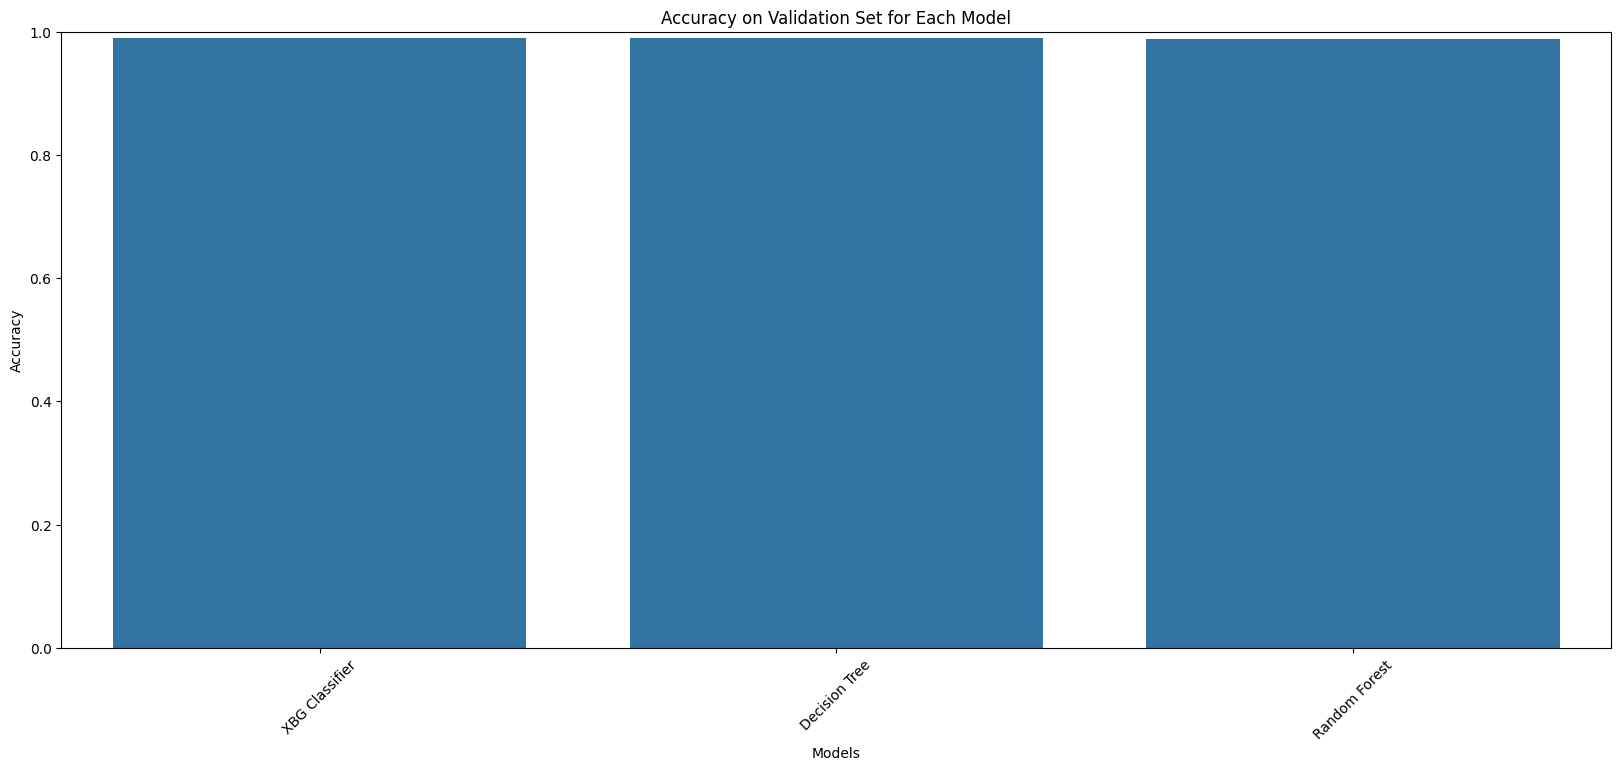

In [68]:
plt.figure(figsize=(20, 8))
plt.title("Accuracy on Validation Set for Each Model")

sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()))
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()

In [69]:
import joblib

# Example: save XGBoost or RandomForest model
joblib.dump(model, 'accident_prediction_model.pkl')

['accident_prediction_model.pkl']

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# 1. Load the dataset
df = pd.read_csv(r"C:\Users\keith\Downloads\ACCITRACK_csv\Combined.csv")

df.columns = df.columns.str.strip()

# 2. Rename columns to match internal convention
df = df.rename(columns={
    'Date Reported': 'date',
    'Time Committed': 'time',
    'Weather Conditions': 'weather',
    'Barangay/Location': 'location',
    'Type of Place': 'type_of_place',
    'VTA Category': 'vta_category',
    'Victim Killed': 'victim_killed',
    'Victim Injured': 'victim_injured',
    'Victim Unharmed': 'victim_unharmed',
    'Main Cause (e.g. Human, Vehicle, Infrastructure, Environmental)': 'cause',
    'Details of Main Cause (e.g.  Human-Intoxication)': 'cause_details',
    'Case Status': 'case_status',
    'Road Conditions': 'road_conditions'
})

# 3. Clean and preprocess
df = df.dropna(subset=['weather', 'road_conditions', 'time', 'location', 'date'])

# Convert victim fields from Yes/No to 1/0
yes_no_map = {'Yes': 1, 'No': 0}
for col in ['victim_killed', 'victim_injured', 'victim_unharmed']:
    df[col] = df[col].map(yes_no_map)

# Extract hour and weekday from date/time
df['hour'] = pd.to_datetime(df['time'], errors='coerce').dt.hour.fillna(0).astype(int)
df['day_of_week'] = pd.to_datetime(df['date'], errors='coerce').dt.weekday.fillna(0).astype(int)

# Encode categorical features
label_cols = ['weather', 'road_conditions', 'location']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Save encoders if needed later

# 4. Define features and target
X = df[['weather', 'road_conditions', 'hour', 'location', 'day_of_week']]
y = df['victim_killed']  # Example target (you can change to injured/unharmed/etc.)

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 7. Evaluate model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {acc:.2f}")

# 8. Save model
joblib.dump(model, "accident_prediction_model.pkl")
print("✅ Model saved as accident_prediction_model.pkl")


✅ Model Accuracy: 1.00
✅ Model saved as accident_prediction_model.pkl
